# 4. 신경망 학습

#### 학습이란?
- 학습이란 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것

## 4.1 데이터에서 학습한다.

신경망
- 신경망은 데이터를 통해 학습할 수 있다.
- 데이터에서 학습한다는 것은 가중치 매개변수의 값을 데이터를 통해 **자동으로 결정한다**는 뜻
- 자동으로 결정된다는 것은 수작업으로 매개변수 값을 설정할 필요가 없다는 것이다.

### 4.1.1 데이터 주도 학습

- 기계학습이란 데이터에서 패턴을 발견하고 데이터로 이야기를 만드는 것이다.
- 문제가 발생했을때 문제의 규칙을 발견하고 예측하는 것을 의미한다.
- **사람의 개입을 최소화** 하고 수집한 데이터로 부터 패턴을 찾으려 시도한다.
- 신경망과 딥러닝은 기존 기계학습에서 사용했던 방법보다 더욱 사람의 개입을 배제할 수 있게 만들어 준다.
- 데이터로 부터 규칙을 찾아 내는건 '사람'이 아닌 '기계'가 해야 하는 일이다.

딥러닝을 **종단간 기계학습(end to end machine learning)** 이라고도 한다. 여기서 종단간은 "처음부터 끝까지"라는 의미로, 데이터(입력)에서 목표한 결과(츨력)를 사람의 개입 없이 얻는다는 뜻을 갖고 있다.

### 4.1.2 훈련 데이터와 시험 데이터

- 기계학습 문제는 데이터를 **훈련 데이터**와 **시험 데이터**로 나눠 학습과 실험을 수행하는 것이 일반적이다. 실제로 학습된 결과를 사용할수 있는가를 평가하기 위해 꼭 거쳐야 되는 과정
- 훈련 데이터 : 학습을 통해 최적의 매개변수를 찾는다.
- 시험 데이터 : 앞서 훈련한 모델의 실력을 평가
- Over Fitting : 한 데이터 셋에만 지나치게 최적화된 상태

## 4.2 손실 함수

**손실함수**   
손실함수란 신경망 성능의 '나쁨'을 나타내는 지표로, 현재의 신경망이 훈련 데이터를 **얼마나 잘 처리하지 '못'하느냐**를 나타낸다.

### 4.2.1 평균 제곱 오차

가장 많이 쓰이는 손실함수는 **평균 제곱 오차(MSE)** 이다.

In [1]:
import numpy as np

def mean_squared_error(y, t):
    return 0.5 * np.sum((y - t)**2)

In [2]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
mean_squared_error(np.array(y), np.array(t))

### 4.2.2 교차 엔트로피 오차

In [3]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y+delta))

- np.log() 함수에 0을 입력하면 마이너스 무한대를 뜻하는 -inf가 되어 더 이상 계산을 진행할 수 없다.
- 아주 작은 값(delta)를 더하여 0이 되지 않도록 하여 오류를 방지함.

In [4]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

In [5]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

In [6]:
cross_entropy_error(np.array(y), np.array(t))

- 정답일 때의 교차 엔트로피 오차는 약 0.51이다.
- 틀렸을 때의 교차 엔트로피 오차는 약 2.3이다.
- 즉, 정답일 때 교차 엔트로피 오차가 작아진다.
- MSE 의 결과와 같은 결과를 나타낸다.

### 4.2.3 미니배치 학습

- 많은 데이터를 대상으로 일일이 손실 함수를 계산하는 것은 힘들다.
- 이런 경우 *데이터 일부*를 추려 전체의 '근사치'로 이용할 수 있다.
    - 이 *데이터 일부* 를 **미니배치**라고 한다.
    - 이러한 학습 방법을 **미니배치 학습**이라고 한다.

In [7]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

이 훈련 데이터에서 무작위로 추리려면 넘파이의 np.random.choice()함수를 쓰면 된다.

In [8]:
train_size = x_train.shape[0]
batch_size = 100 # 100개 데이터를 추린다.
batch_mask = np.random.choice(train_size, batch_size) # 60,000개 중 100개를 고름
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [9]:
np.random.choice(60000, 10)

### 4.2.4 (배치용) 교차 엔트로피 오차 구현하기

- 데이터가 하나인 경우와 데이터가 배치로 묶여 입력될 경우 모두를 처리할 수 있게 구현

In [10]:
def cross_entropy_error(y, t):
    if y.dim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

- y는 신경망의 출력
- t는 정답 레이블
- y가 1차원이라면, 즉 데이터 하나당 교차 엔트로피 오차를 구하는 경우는 reshape 함수로 데이터의 형상을 바꿔준다.
- 그리고 배치의 크기로 나눠 정규화하고 이미지 1장당 평균의 교차 엔트로피 오차를 계산한다.

정답 레이블이 원-핫 인코딩이 아니라 '2'나 '7' 등의 숫자 레이블로 주어졌을 때의 교차 엔트로피 오차는 다음과 같이 구현할 수 있다.

In [11]:
def cross_entropy_error(y, t):
    if y.dim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

### 4.2.5 왜 손실함수를 설정 하는가?

**함수를 사용하는 이유**

- 우리의 목적은 높은 "정확도"를 끌어내는 매개변수 값을 찾는 것이다.
- 정확도라는 실제적인 값이 있지만 이를 사용하지 않고 함수를 사용하는 이유는 **미분을 통해 최적 값을 찾아낼수 있기 때문**
    - 신경망의 학습에서 최적의 매개변수(가중치와 편향)를 탐색할 때 손실 함수의 값을 가능한 한 작게 하는 매개변수 값을 찾는다.
    - 이때 매개변수의 미분(기울기)을 계산, 미분값을 단서로 매개변수의 값을 서서히 갱신하는 과정을 반복 한다.
    - 값을 지표로 삼으면 미분값이 0이 되기 때문

## 4.3 수치 미분

### 4.3.1 미분

- 미분은 '특정 순간'의 변화량을 뜻한다.

*__numerical diff(f,x)__*   
- 반올림 오차 문제를 해결하기 위해 **1e-4**를 입력한다.
- 실제로 좋은 결과를 얻을 수 있다고 알려진 값이다.

In [12]:
# 나쁜 구현 예 (h의 값이 너무 작음)
def numerical_diff_1(f, x):
    h = 1e-50
    return (f(x+h) - f(x)) / h

In [13]:
def function_1(x):
    return x ** 2

print(function_1(2))
numerical_diff_1(function_1, 2)

In [14]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x)) / h

In [15]:
numerical_diff(function_1, 2)

### 4.3.2 수치 미분의 예

In [16]:
def function_1(x):
    return (0.01 * (x ** 2)) + (0.1 * x)

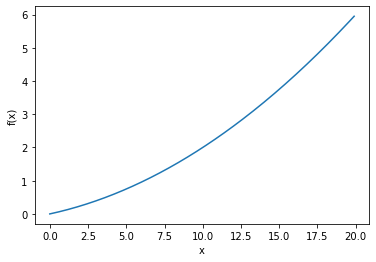

In [17]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0, 20.0, 0.1) # 0에서 20까지 0.1 간격의 배열 x를 만든다.
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [18]:
numerical_diff(function_1, 5)

0.20000099999917254

In [19]:
numerical_diff(function_1, 10)

0.3000009999976072

0.20000099999917254


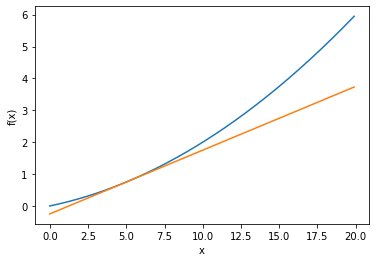

In [20]:
def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

### 4.3.3 편미분

In [21]:
def function_3(x, y):
    return x**2 + y**2

In [22]:
x_3 = np.arange(-5, 5, 0.25)
y_3 = np.arange(-5, 5, 0.25)

In [23]:
function_3(x_3, y_3)

array([50.   , 45.125, 40.5  , 36.125, 32.   , 28.125, 24.5  , 21.125,
       18.   , 15.125, 12.5  , 10.125,  8.   ,  6.125,  4.5  ,  3.125,
        2.   ,  1.125,  0.5  ,  0.125,  0.   ,  0.125,  0.5  ,  1.125,
        2.   ,  3.125,  4.5  ,  6.125,  8.   , 10.125, 12.5  , 15.125,
       18.   , 21.125, 24.5  , 28.125, 32.   , 36.125, 40.5  , 45.125])

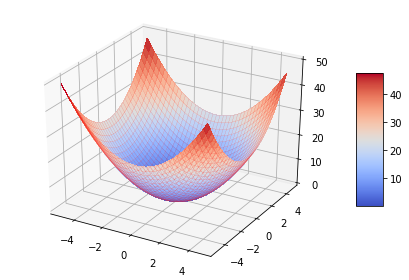

In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')

X, Y = np.meshgrid(x_3, y_3)
Z = function_3(X, Y)

surf = ax.plot_surface(X, Y, Z, cmap='coolwarm', linewidth=0, antialiased=False)
wire = ax.plot_wireframe(X, Y, Z, color='r', linewidth=0.1)
fig.colorbar(surf, shrink=0.5, aspect=5)
fig.tight_layout()
plt.show()

- 변수가 여럿인 함수에 대한 미분을 **편미분**이라고 한다.
- x0에 대한 미분을 af / ax0 ..으로 표기한다.

In [25]:
def function_tmp1(x0):
    return x0*x0 + 4.0 ** 2.0
# f(x0, x1) = x0^2 + x1^2을 x0 = 3, x1 = 4일때 x0에 대해 편미분한 함수

In [26]:
numerical_diff(function_tmp1, 3.0)

6.000099999994291

In [27]:
def function_tmp2(x1):
    return 3.0 ** 2.0 + x1 * x1

In [28]:
numerical_diff(function_tmp2, 4)

8.00009999998963

## 4.4 기울기

- 모든 변수의 편미분을 벡터로 정리한 것을 **기울기**라고 한다.
- n 차원의 미분 결과는 n - 1 차원이 된다.
- 2차원에서의 미분 결과 : 곡선 위의 접점의 기울기
- 3차원에서의 미분 결과 : 곡면 위의 접평면의 법선방향(법선벡터)

In [29]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h)
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x-h)
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / 2*h
        x[idx] = tmp_val
        
    return grad

In [30]:
def function_2(x):
    return x[0] ** 2 + x[1] ** 2
    # 또는 return np.sum(x ** 2)

In [31]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6.e-08, 8.e-08])

In [32]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0.e+00, 4.e-08])

In [33]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6.e-08, 0.e+00])

In [34]:
def numerical_gradient_1(f, x, y):
    h = 1e-4
    grad_1 = (f(x+h, 0) - f(x, 0)) / h
    grad_2 = (f(0, y+h) - f(0, y)) / h
    grad = np.array([grad_1, grad_2])
    return grad

In [35]:
def function_3(x, y):
    return x**2+y**2

In [36]:
import numpy as np
x_3 = np.arange(-5, 5, 0.25)
y_3 = np.arange(-5, 5, 0.25)

In [37]:
numerical_gradient_1(function_3, x_3, y_3)

array([[-9.9999e+00, -9.4999e+00, -8.9999e+00, -8.4999e+00, -7.9999e+00,
        -7.4999e+00, -6.9999e+00, -6.4999e+00, -5.9999e+00, -5.4999e+00,
        -4.9999e+00, -4.4999e+00, -3.9999e+00, -3.4999e+00, -2.9999e+00,
        -2.4999e+00, -1.9999e+00, -1.4999e+00, -9.9990e-01, -4.9990e-01,
         1.0000e-04,  5.0010e-01,  1.0001e+00,  1.5001e+00,  2.0001e+00,
         2.5001e+00,  3.0001e+00,  3.5001e+00,  4.0001e+00,  4.5001e+00,
         5.0001e+00,  5.5001e+00,  6.0001e+00,  6.5001e+00,  7.0001e+00,
         7.5001e+00,  8.0001e+00,  8.5001e+00,  9.0001e+00,  9.5001e+00],
       [-9.9999e+00, -9.4999e+00, -8.9999e+00, -8.4999e+00, -7.9999e+00,
        -7.4999e+00, -6.9999e+00, -6.4999e+00, -5.9999e+00, -5.4999e+00,
        -4.9999e+00, -4.4999e+00, -3.9999e+00, -3.4999e+00, -2.9999e+00,
        -2.4999e+00, -1.9999e+00, -1.4999e+00, -9.9990e-01, -4.9990e-01,
         1.0000e-04,  5.0010e-01,  1.0001e+00,  1.5001e+00,  2.0001e+00,
         2.5001e+00,  3.0001e+00,  3.5001e+00,  4.

No handles with labels found to put in legend.


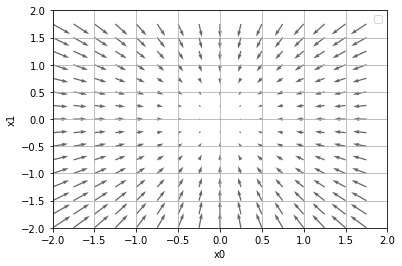

In [38]:
import matplotlib.pyplot as plt
x0 = np.arange(-2.0, 2.0, 0.25)
x1 = np.arange(-2.0, 2.0, 0.25)
X, Y = np.meshgrid(x0, x1)

X = X.flatten()
Y = Y.flatten()

grad = numerical_gradient_1(function_3, X, Y)

plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1], angles="xy", color="#666666")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.legend()
plt.draw()
plt.show()

### 4.4.1 경사법(경사 하강법)

- 기계학습 문제 대부분은 학습 단계에서 최적의 매개변수를 찾아낸다.
- 신경망 역시 최적의 매개변수(가중치와 편향)를 학습 시에 찾아야 한다.
- 실제로 매개변수는 매우 다양하게 고려해야해서 최솟값을 찾기 어렵다.
    - 이를 해결하기 위해 경사 하강법을 사용한다.
- 주의해야할 점은 실제로 최솟값임을 보장하기는 어렵다.
        - 극솟값은 국소적인 최솟값(근방에서 최소)

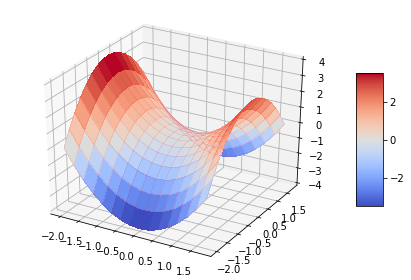

In [39]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def function_4(x, y):
    return x**2 - y**2

x0 = np.arange(-2.0, 2.0, 0.25)
x1 = np.arange(-2.0, 2.0, 0.25)

fig = plt.figure()
ax = fig.gca(projection='3d')

X, Y = np.meshgrid(x0, x1)
Z = function_4(X, Y)

surf = ax.plot_surface(X, Y, Z, cmap='coolwarm', linewidth=0, antialiased=False)
wire = ax.plot_wireframe(X, Y, Z, color='r', linewidth=0.1)
fig.colorbar(surf, shrink=0.5, aspect=5)
fig.tight_layout()
plt.show()

- 안장점은 어느 방향에서 보면 극댓값이고 다른 방향에서 보면 극솟값이 되는 점이다.

**경사법**   
함수의 최솟값을 찾는 방법을 생각해보자.
- 사람이라면 미분을 통해서 최솟값을 구할 수 있다.
- 기울기가 가리키는 곳에 함수의 최솟값이 있는지 아닌지를 확인할 수 있다.
- 기울기가 가리키는 방향에 최솟값이 있을 수도 있고 없을 수도 있다.

*__경사법이란?__*   
- 1차 근삿값 발견용 최적화 알고리즘
- 기본 개념은 함수의 기울기(경사)를 구하여 기울기가 낮은 쪽으로 계속 이동시켜서 극값에 이를 때까지 반복시키는 것
- 방법
    1. 현 위치에서 기울어진 방향으로 일정 거리만큼 이동한다.
    2. 이동한 곳에서 기울기를 구한다.
    3. 기울어진 방향으로 일정 거리만큼 이동한다.

In [40]:
x_old = 0
x_new = 6 # The Algorithm starts at x = 6
eps = 0.01 # step size
precision = 0.00001

def f_prime(x):
    return 4 * x**3 - 9 * x**2

while abs(x_new - x_old) > precision:
    x_old = x_new
    x_new = x_old - eps * f_prime(x_old)

print("Local minimum occurs at: " + str(x_new))

Local minimum occurs at: 2.2499646074278457


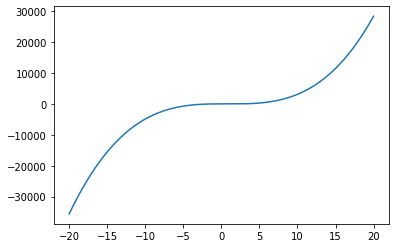

In [41]:
x = np.arange(-20, 20, 0.01)
y = f_prime(x)
plt.plot(x, y)
plt.show()

In [42]:
# 함수 재생성 (변수가 1개)
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val
    return grad

def gradient_descent(f, init_x, lr=0.01, step_num=100): # lr = learning rate
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

In [43]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

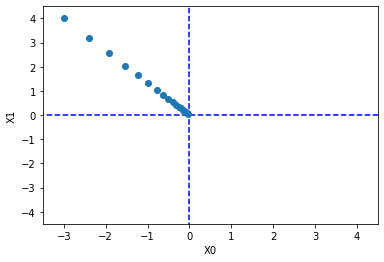

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# 변화하는 점선을 표시하기 위해 history list를 만들어준다.
def gradient_descent_h(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []
    
    for i in range(step_num):
        x_history.append(x.copy())
        
        grad = numerical_gradient(f, x)
        x -= lr * grad
        
    return x, np.array(x_history)

init_x = np.array([-3.0, 4.0])

lr = 0.1
step_num = 20
x, x_history = gradient_descent_h(function_2, init_x, lr, step_num)

plt.plot([-5, 5], [0, 0], '--b')
plt.plot([0,0], [-5, 5], '--b')
plt.plot(x_history[:, 0], x_history[:, 1], 'o')

plt.xlim(-3.5, 4.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

**학습률**   
- 학습률이 너무 크거나 작으면 문제가 발생할수 있다.
- 원하는 값을 구하지 못하고 연산이 끝날수도 있고, 또는 발산할수도 있다.

### 4.4.2 신경망에서의 기울기

**손실함수에 대한 기울기**
- 가중치 매개변수에 대한 손실함수의 기울기를 구하면 된다.

**simpleNet Class**
- common/functions.py 에서 정의한 sofrmax 와 cross_entropy_error 메서드를 사용한다.
- common/gradient.p7y 에서 정의한 numerical_gradient 메서드도 이용한다.
- SimpleNet 클래스는 형상이 (2,3) 인 가중치 매개변수를 하나의 인스턴스 변수로 갖는다. (초기값으로 랜덤으로 지정해주도록 하자.)
- predic(x) 매서드는 예측을 수행
- loss(x,t) 함수는 손실값을 구하는 함수
    - 교차 엔트로피 함수를 이용하여 구해준다.  E=−∑ktklogyk

In [45]:
import sys, os
sys.path.append("./code/")  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W=np.random.randn(2,3)
        
    def predict(self,x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z= self.predict(x)
        y=softmax(z)
        loss = cross_entropy_error(y,t)
        
        return loss

In [46]:
np.random.randn(2, 3)

array([[-1.7179634 ,  0.06602535,  0.34520602],
       [ 0.97905793, -0.18602663,  0.18889278]])

In [47]:
net = simpleNet()
print(net.W)

[[-0.56546446  0.94821381 -0.13198   ]
 [ 1.27026627 -0.75086048  1.59227629]]


In [48]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[ 0.80396096 -0.10684614  1.35386066]


In [49]:
np.argmax(p)
t = np.array([0, 0, 1])
net.loss(x, t)

0.5928181784855595

In [50]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.19137052  0.07696912 -0.26833964]
 [ 0.28705577  0.11545368 -0.40250946]]
